# Foundations of Data Mining: Fashion-MNIST Challenge

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [ ]:
# Please fill in your names here
NAME_STUDENT_1 = "Rashmi Kamath 1281879"

In [28]:
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 200 # This controls the size of your figures
plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

import seaborn as sns
import sklearn.decomposition as deco
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix

## Fashion-MNIST
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [29]:
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [30]:
fmnist_data = oml.datasets.get_dataset(40996) # Download MNIST data
# Get the predictors X and the labels y
X, y = fmnist_data.get_data(target=fmnist_data.default_target_attribute); 

In [31]:
# build a list of figures for plotting
def buildFigureList(fig, subfiglist, titles, length):
    
    for i in range(0,length):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(1,length,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.set_title(titles[i], fontsize=6)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

def buildFig(fig, subfiglist):
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

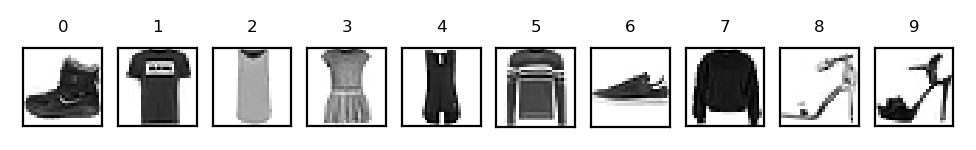

In [32]:
subfiglist = []
titles=[]

for i in range(0,10):
    subfiglist.append(X[i])
    titles.append(i)

buildFigureList(plt.figure(1),subfiglist, titles, 10)
plt.show()

### a)  Analyze the main components of a class (6 points)

Write a piece of code that takes a set of 28x28 images as input and does the following:

- Compute and show the mean and the first two principle components as 
images
- Make a 2-dimensional scatter plot of the transformed data 
- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

Apply your code to the class 0 (T-shirt/top) of Fashion MNIST. Answer the following questions:

- What aspect(s) of the data does the first component capture? 
- What aspect(s) of the data does the second component capture? 


#### Solution 1.a. 
- Compute and show the mean and the first two principle components as images

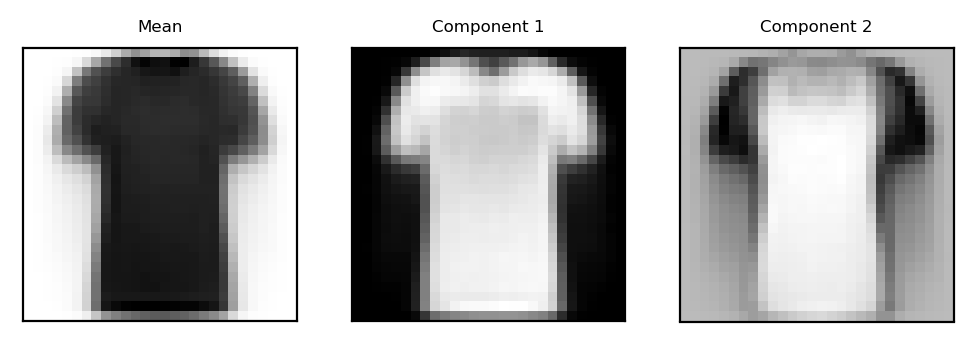

In [33]:
from sklearn.decomposition import PCA;

X_ts = X[y==0]
p = PCA(n_components=2);
X_pca = p.fit_transform(X_ts);

titles = ["Mean", "Component 1","Component 2"]
arr=[np.mean(X_ts, axis=0), p.components_[0, :], p.components_[1, :]]

buildFigureList(plt.figure(1),arr, titles, 3)
plt.show()

- Make a 2-dimensional scatter plot of the transformed data

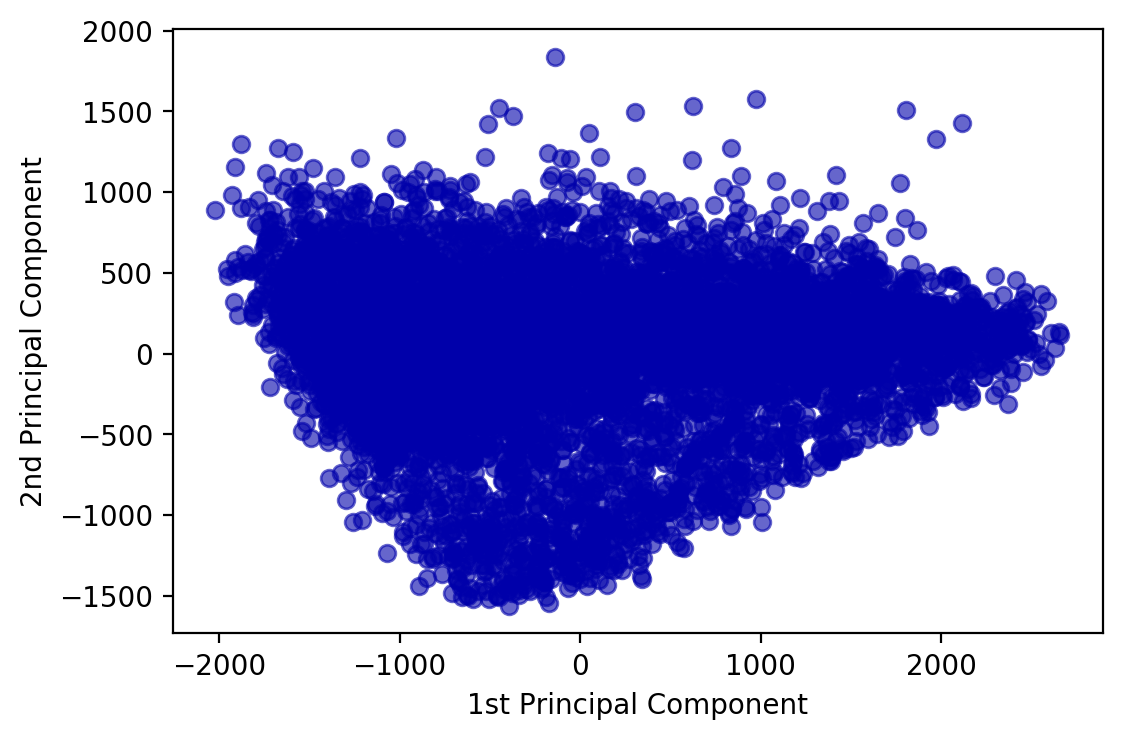

In [34]:
def plot_pca_scatter():
    p_x = X_pca[:,0]
    p_y = X_pca[:,1]
    plt.scatter(p_x, p_y, alpha=0.6)
    plt.xlabel('1st Principal Component')
    plt.ylabel('2nd Principal Component')

plot_pca_scatter()

- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

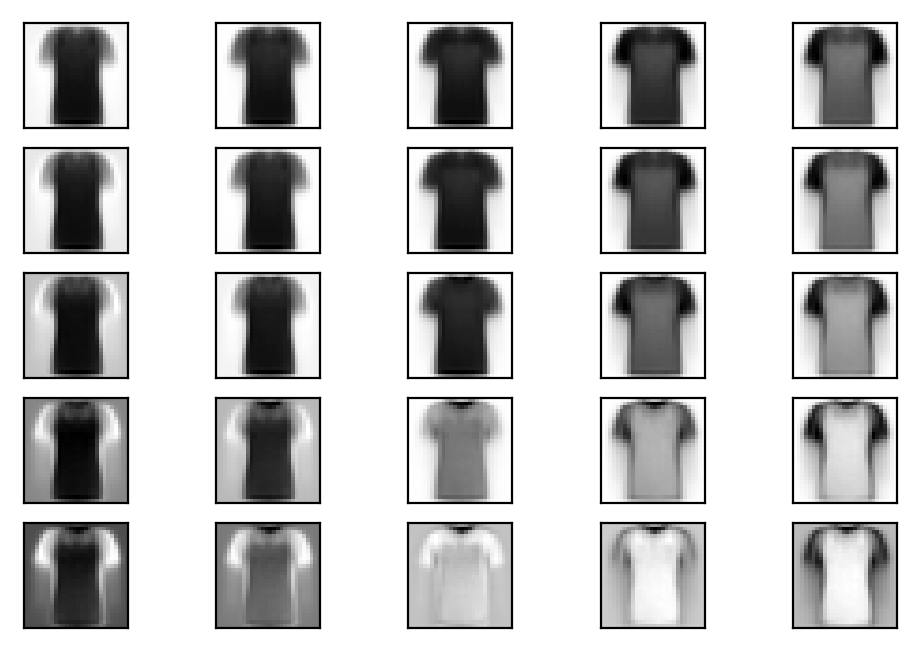

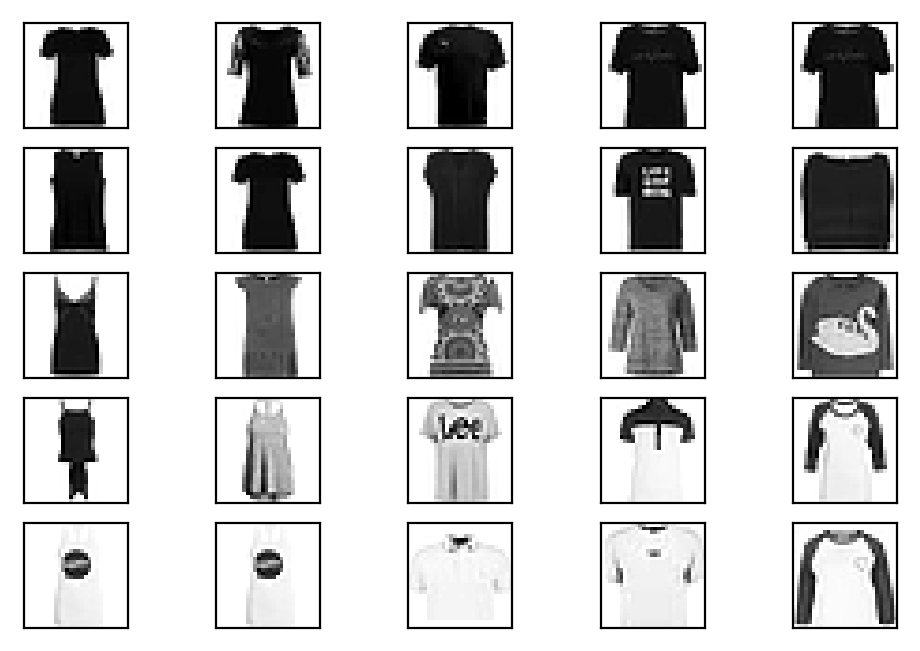

In [38]:
pca = PCA(n_components=2);
X_pca = pca.fit_transform(X_ts);
mean = np.mean(X_pca, axis=0)
std = np.std(X_pca, axis=0)
minm, maxm = mean - 3*std, mean + 3*std
mat_x = np.arange(minm[0],maxm[0]+1, (maxm[0]-minm[0])/4)
mat_y = np.arange(minm[1],maxm[1]+1, (maxm[1]-minm[1])/4)
mat = np.array([[x,y] for x in mat_x for y in mat_y])
pca_mat = pca.inverse_transform(mat)

points = []
for z in matrix:
    dist = np.apply_along_axis(np.linalg.norm, 1, X_pca-z)
    points.append(X_top[np.argmin(dist)])
    
# Plot the points as images
buildFig(plt.figure(1), pca_mat)
buildFig(plt.figure(2), points)

#### Analysis:
- What aspect(s) of the data does the first component capture? 
- What aspect(s) of the data does the second component capture? 


Analysis: 1st component captures the intensity (black to white) and 2nd component capture the sleaves. 

### b) Analyze two classes together and separately (2 points)

Apply the same analysis as in a) to the following subsets of data points:

- images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color. 
- images in class 2 (Pullover). 
- images in class 4 (Coat). 

Compare the three analyses.  

#### Solution 1.b. 
- images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color.

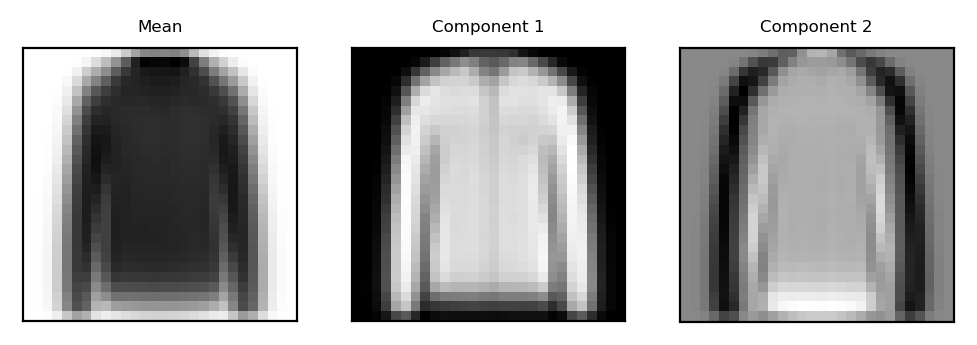

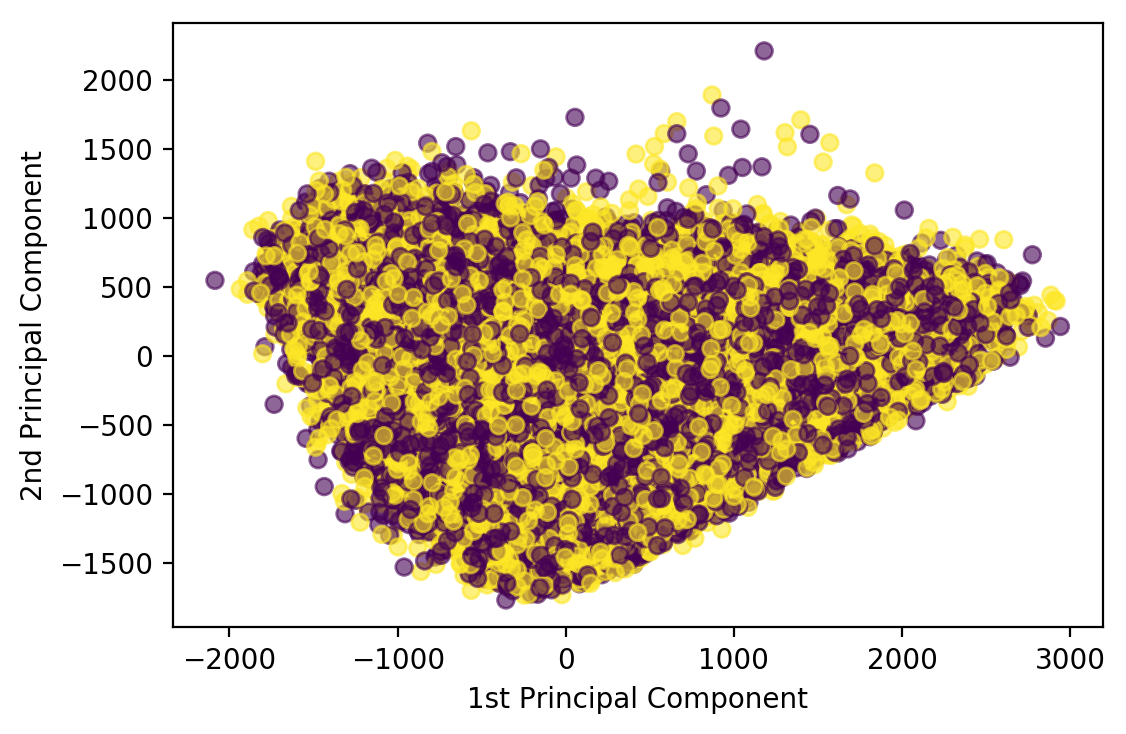

In [46]:
# class pullover
X_pullover = X[y==2]
# class coat 
X_coat = X[y==4]
# Union of the pullover and coat 
X_p_c = np.concatenate((X_pullover,X_coat))

# To compute mean, 1st and 2nd component  
p = PCA(n_components=2);
X_pca = p.fit_transform(X_p_c);
titles = ["Mean", "Component 1","Component 2"]
arr=[np.mean(X_p_c, axis=0), p.components_[0, :], p.components_[1, :]]
buildFigureList(plt.figure(1),arr, titles, 3)
plt.show()


def plot_pca_scatter_2():
    px = X_pca[:,0]
    py = X_pca[:,1]
    plt.scatter(px, py, alpha=0.6, c=y[(np.where((y==2)|(y==4)))])
    plt.xlabel('1st Principal Component')
    plt.ylabel('2nd Principal Component')

plot_pca_scatter_2()

- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

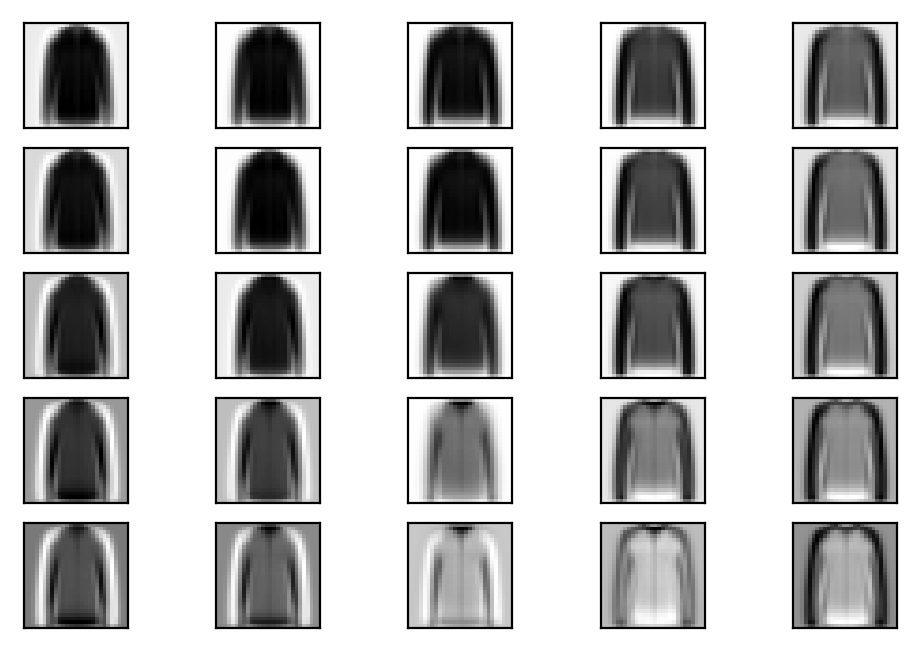

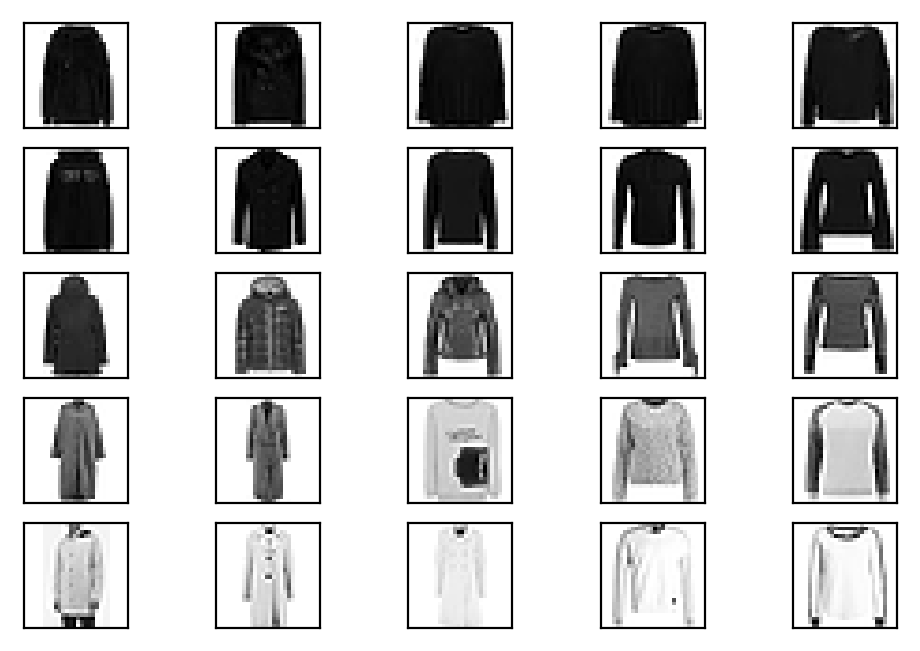

In [47]:
pca = PCA(n_components=2);
X_pca = pca.fit_transform(X_p_c);
mean = np.mean(X_pca, axis=0)
std = np.std(X_pca, axis=0)
minm, maxm = mean - 3*std, mean + 3*std
mat_x = np.arange(minm[0],maxm[0]+1, (maxm[0]-minm[0])/4)
mat_y = np.arange(minm[1],maxm[1]+1, (maxm[1]-minm[1])/4)
mat = np.array([[x,y] for x in mat_x for y in mat_y])
pca_mat = pca.inverse_transform(mat)

points = []
for z in matrix:
    dist = np.apply_along_axis(np.linalg.norm, 1, X_pca-z)
    points.append(X_pull_coat[np.argmin(dist)])
    
# Plot the points as images
buildFig(plt.figure(1), pca_mat)
buildFig(plt.figure(2), points)

#### Analysis:  It is obersved that both the classes have very similar characteristics with long sleeves, but have slighty different height.

- images in class 2 (Pullover). 
- images in class 4 (Coat). 

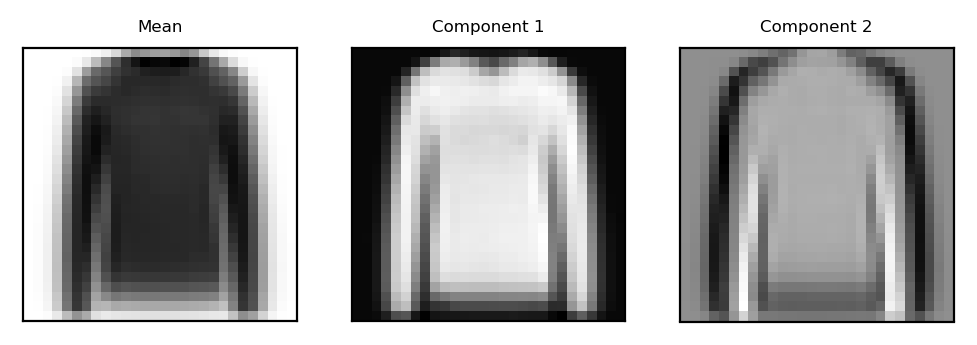

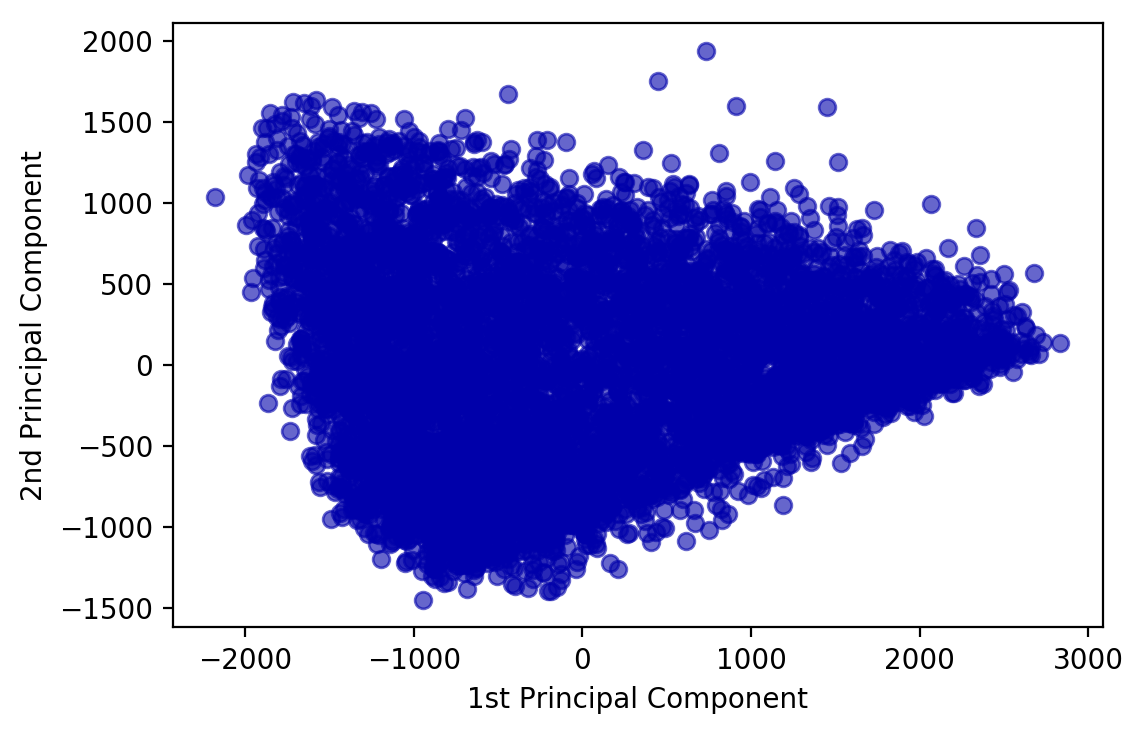

In [52]:
from sklearn.decomposition import PCA;

#for pullover, class 2
X_pullover = X[y==2]
p = PCA(n_components=2);
X_pca_pull = p.fit_transform(X_pullover);
titles = ["Mean", "Component 1","Component 2"]
arr=[np.mean(X_pullover, axis=0), p.components_[0, :], p.components_[1, :]]
buildFigureList(plt.figure(1),arr, titles, 3)
plt.show()

def plot_pca_scatter():
    p_x = X_pca_pull[:,0]
    p_y = X_pca_pull[:,1]
    plt.scatter(p_x, p_y, alpha=0.6)
    plt.xlabel('1st Principal Component')
    plt.ylabel('2nd Principal Component')
plot_pca_scatter()

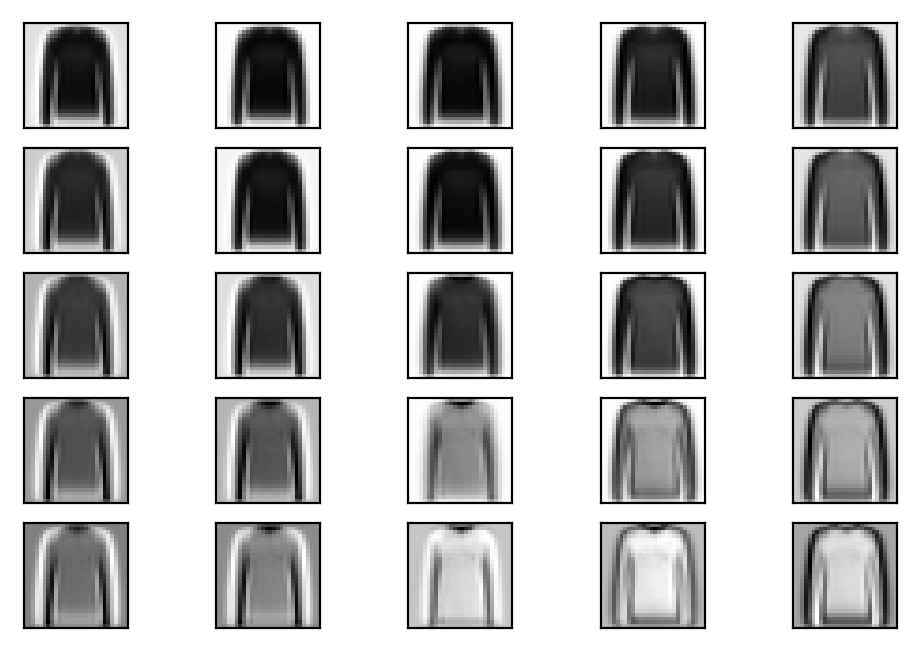

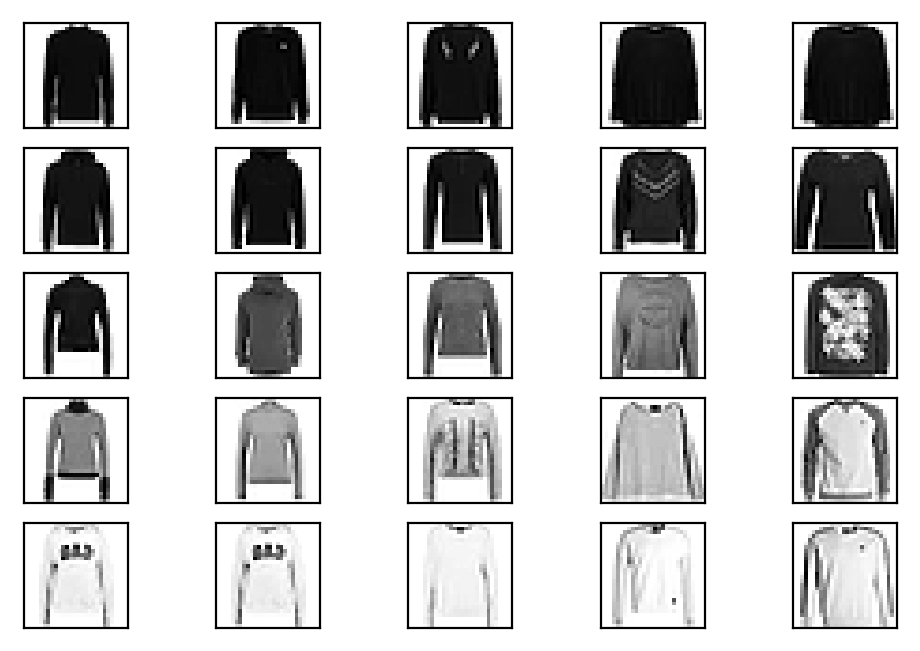

In [51]:
#for pullover, class 2

pca = PCA(n_components=2);
X_pca_pull = pca.fit_transform(X_pullover);
mean = np.mean(X_pca_pull, axis=0)
std = np.std(X_pca_pull, axis=0)
minm, maxm = mean - 3*std, mean + 3*std
mat_x = np.arange(minm[0],maxm[0]+1, (maxm[0]-minm[0])/4)
mat_y = np.arange(minm[1],maxm[1]+1, (maxm[1]-minm[1])/4)
mat = np.array([[x,y] for x in mat_x for y in mat_y])
pca_mat = pca.inverse_transform(mat)

points = []
for z in matrix:
    dist = np.apply_along_axis(np.linalg.norm, 1, X_pca_pull-z)
    points.append(X_pullover[np.argmin(dist)])
    
# Plot the points as images
buildFig(plt.figure(1), pca_mat)
buildFig(plt.figure(2), points)

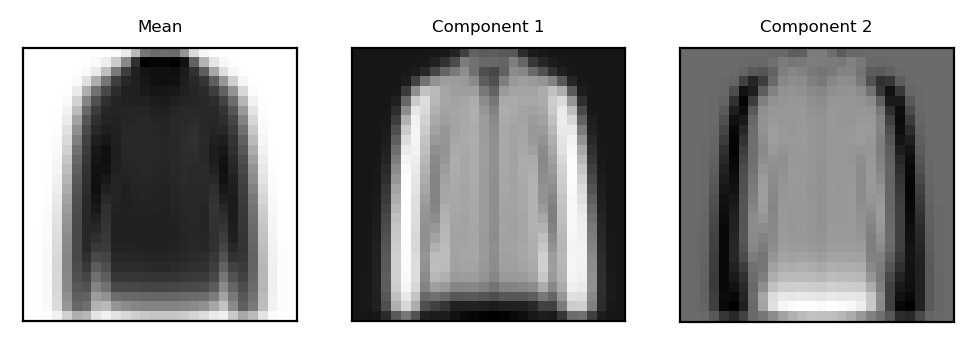

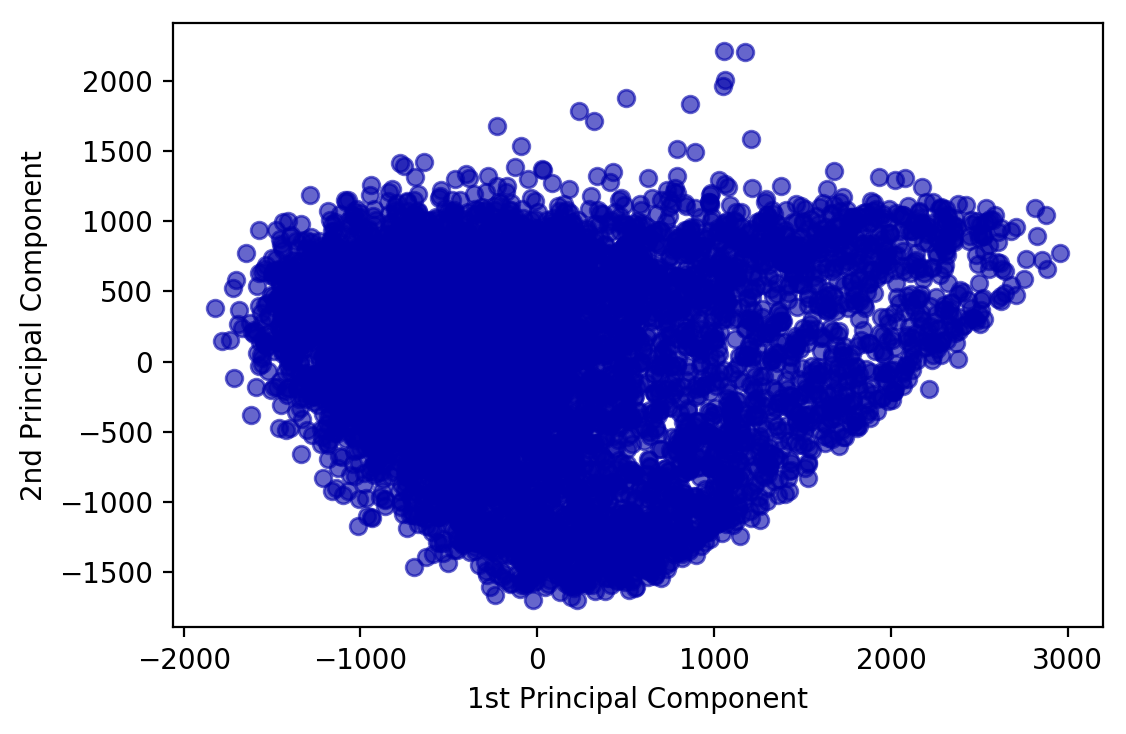

In [56]:
from sklearn.decomposition import PCA;

#for coat, class 4
X_coat = X[y==4]
p = PCA(n_components=2);
X_pca_coat = p.fit_transform(X_coat);
titles = ["Mean", "Component 1","Component 2"]
arr=[np.mean(X_coat, axis=0), p.components_[0, :], p.components_[1, :]]
buildFigureList(plt.figure(1),arr, titles, 3)
plt.show()

def plot_pca_scatter():
    p_x = X_pca_coat[:,0]
    p_y = X_pca_coat[:,1]
    plt.scatter(p_x, p_y, alpha=0.6)
    plt.xlabel('1st Principal Component')
    plt.ylabel('2nd Principal Component')
plot_pca_scatter()

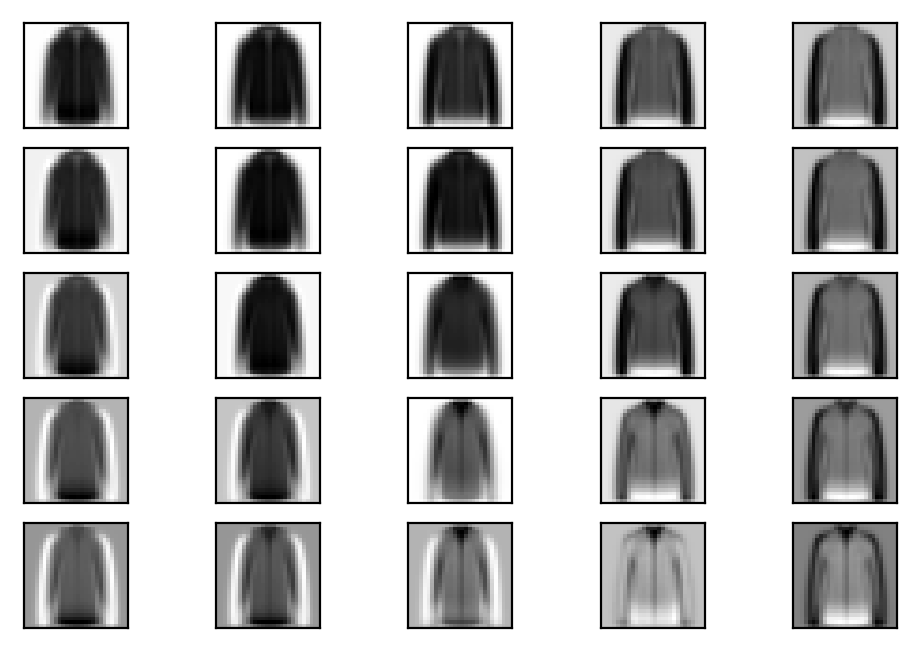

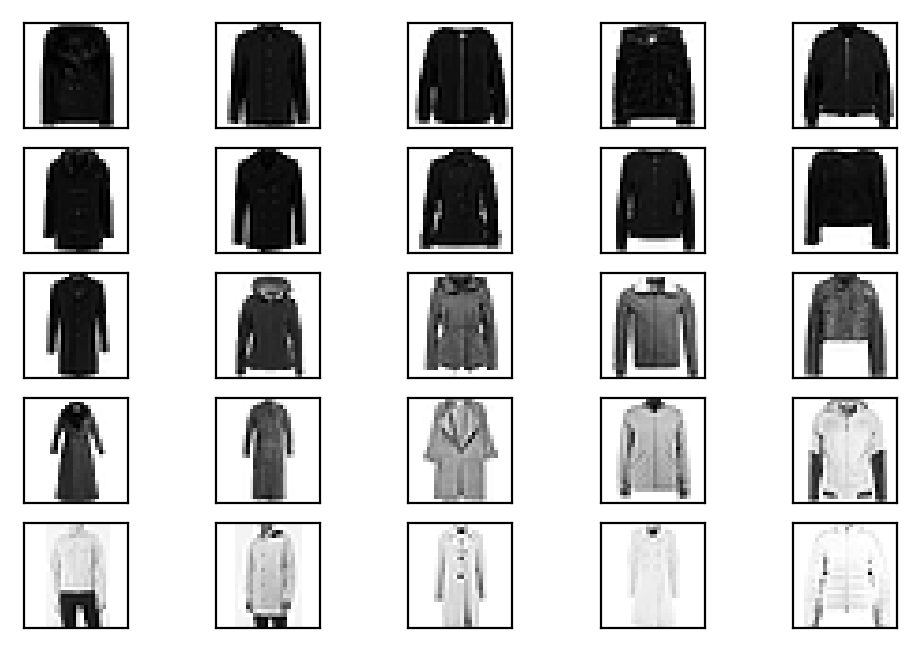

In [59]:
#for coat, class 4

pca = PCA(n_components=2);
X_pca_coat = pca.fit_transform(X_coat);
mean = np.mean(X_pca_coat, axis=0)
std = np.std(X_pca_coat, axis=0)
minm, maxm = mean - 3*std, mean + 3*std
mat_x = np.arange(minm[0],maxm[0]+1, (maxm[0]-minm[0])/4)
mat_y = np.arange(minm[1],maxm[1]+1, (maxm[1]-minm[1])/4)
mat = np.array([[x,y] for x in mat_x for y in mat_y])
pca_mat = pca.inverse_transform(mat)

points = []
for z in matrix:
    dist = np.apply_along_axis(np.linalg.norm, 1, X_pca_coat-z)
    points.append(X_coat[np.argmin(dist)])
    
# Plot the points as images
buildFig(plt.figure(1), pca_mat)
buildFig(plt.figure(2), points)

#### Analysis:
- We see that mean, component1, component2 for combination, pullover and coat all 3 are almost the same. This is because both have similar characteristics with long sleaves and only little variation in length. 
- We also find that both the classes have changes in intensities ranging from black to white. 
- In the matrix we observe the changes in length, broadness, sleave size and intensity aspected of the classes. 


### c) Analyze a cluster computed by k-means (2 Points)

Run k-means on Fashion MNIST with k=10 using k-means++ and random_state=0. 

Compute and show a confusion matrix of the clusters with respect to the original labels. 

Choose a cluster where more than one class is predominant.
Apply the same analysis as in a) to the components of the chosen cluster. In the scatter plot, indicate the original class labels with color.

In [61]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1).fit(X_train, y_train)
y_pred = kmeans.predict(X_test)

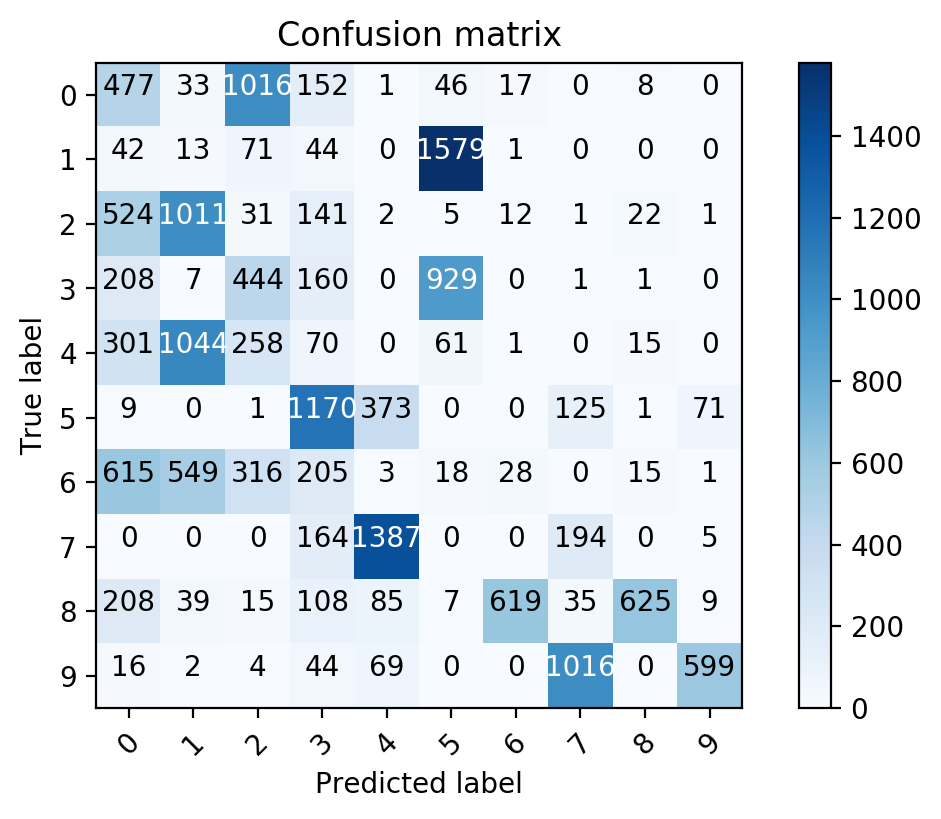

In [62]:
# This is taken from the following: 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import itertools

def plot_cnf_mat(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap);
    plt.title(title);
    plt.colorbar();
    tick_marks = np.arange(len(classes));
    plt.xticks(tick_marks, classes, rotation=45);
    plt.yticks(tick_marks, classes);

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black");

    plt.tight_layout();
    plt.ylabel('True label');
    plt.xlabel('Predicted label');

cnf_matrix = confusion_matrix(y_test, y_pred);
np.set_printoptions(precision=2);

plt.figure();
plot_cnf_mat(cnf_matrix, classes=fmnist_classes,
                      title='Confusion matrix');

plt.show();
pass;

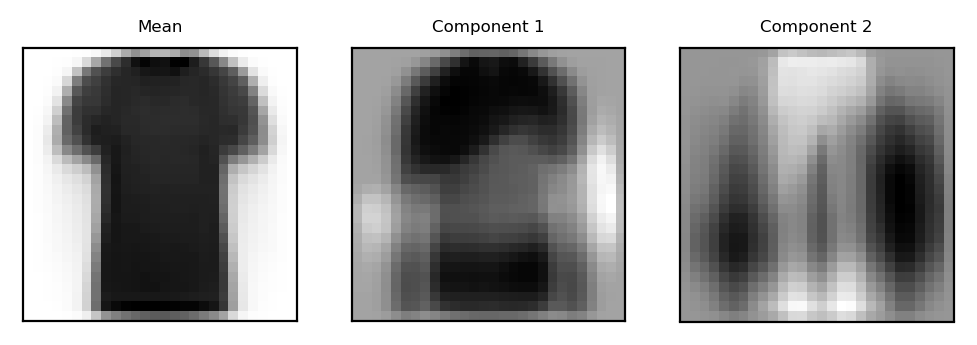

In [63]:
from sklearn.decomposition import PCA;

#selecting the cluster where more than 1 class is predominant 
predom_cluster = X[np.where(kmeans.labels_ == 1)]
p = PCA(n_components=2);
X_pca = p.fit_transform(predom_cluster);

#computing mean, componenent 1 and component 2 on the above selection 
titles = ["Mean", "Component 1","Component 2"]
arr=[np.mean(X_top, axis=0), p.components_[0, :], p.components_[1, :]]

buildFigureList(plt.figure(1),arr, titles, 3)
plt.show()

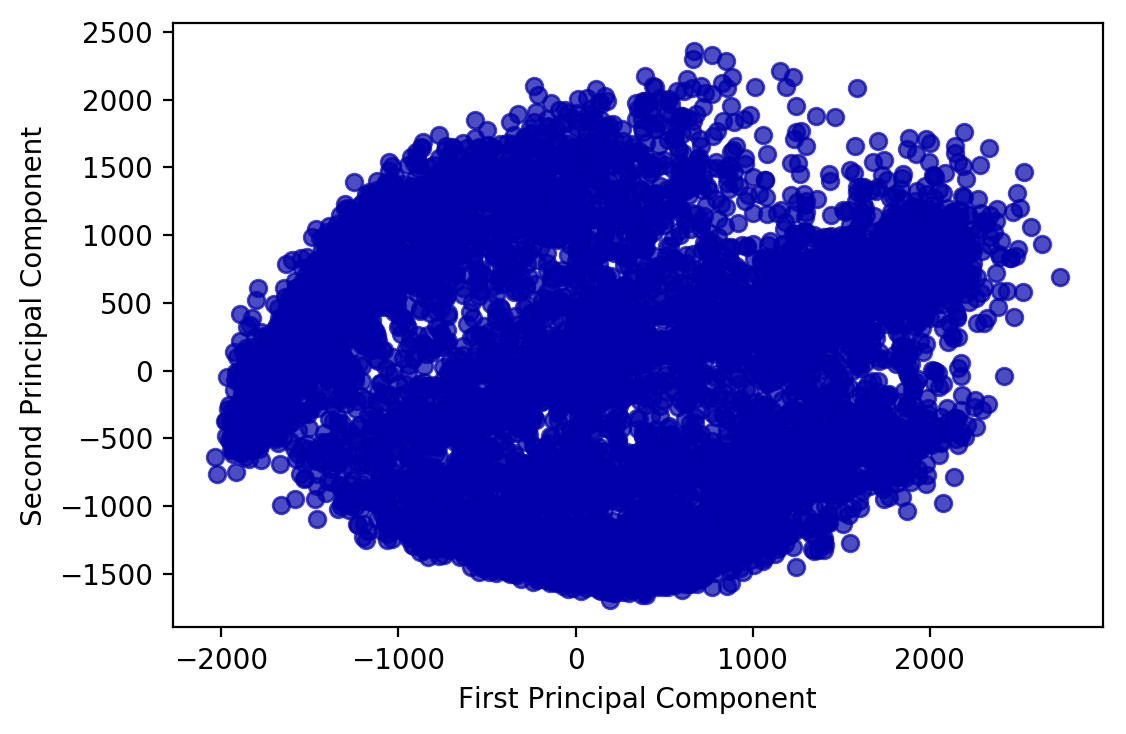

In [64]:
# tried to different colors, finally took single color for plotting 

def plot_pca_scatter():
    px = X_pca[:,0]
    py = X_pca[:,1]
    plt.scatter(px, py, alpha=0.7)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

plot_pca_scatter()

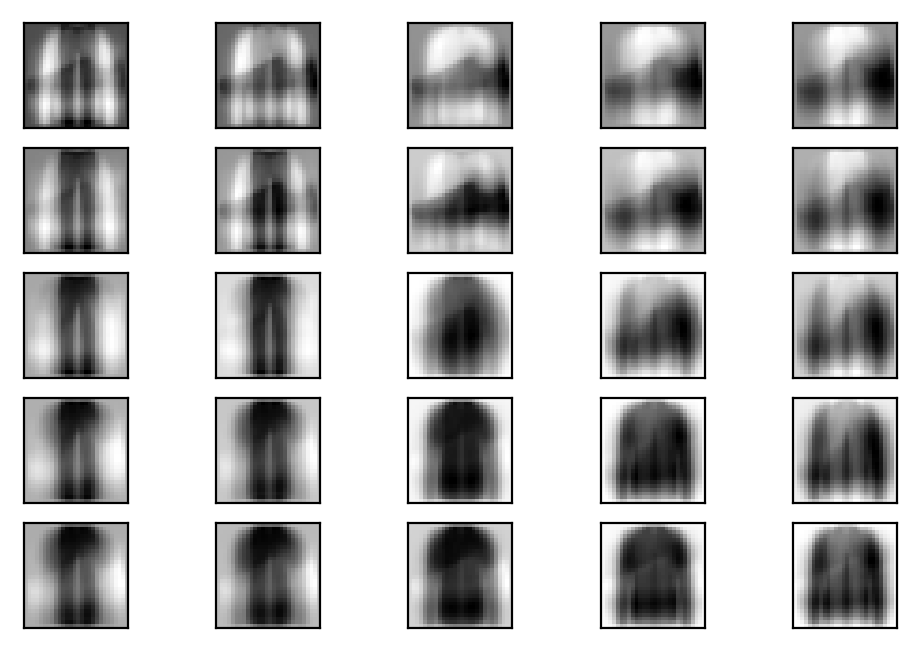

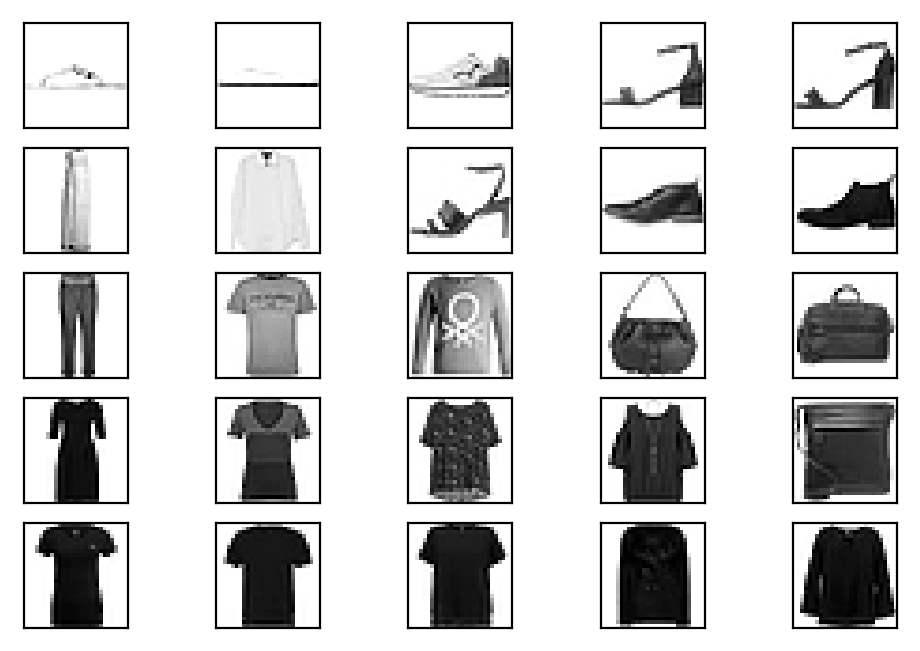

In [66]:
#images after selecting the cluster where more than 1 class is predominant

pca = PCA(n_components=2);
X_pca = pca.fit_transform(predom_cluster);
mean = np.mean(X_pca, axis=0)
std = np.std(X_pca, axis=0)
minm, maxm = mean - 3*std, mean + 3*std
mat_x = np.arange(minm[0],maxm[0]+1, (maxm[0]-minm[0])/4)
mat_y = np.arange(minm[1],maxm[1]+1, (maxm[1]-minm[1])/4)
mat = np.array([[x,y] for x in mat_x for y in mat_y])
pca_matrix = pca.inverse_transform(mat)

closest_points = []
for z in matrix:
    dist = np.apply_along_axis(np.linalg.norm, 1, X_pca-z)
    closest_points.append(predom_cluster[np.argmin(dist)])
    
# Plot the points as images
buildFig(plt.figure(1), pca_matrix)
buildFig(plt.figure(2), closest_points)

#### Analysis 
- Since we are asked to consider the images after selecting the cluster where more than 1 class is predominant, it is very difficult to analyse which component captures which aspect. 
- We observe that the mean still remains a shirt like outline due to the images ranging from shoes/sandals to long/broad coats. 
- This is also observed in out matrix at the top left we see thin sandals whereas bottom right corner shows long sleave coat type image. 